# Country Prediction and Analysis
Dastan Abdulla  
Ling 1340: Data Science for Linguists  
04/08/2024  

In [1]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Imports
import pandas as pd
import numpy as np
# For plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
bio_df = pd.read_pickle('../data/bio_df.pkl')
bio_df.head(5)

,speakerid,native_language,country,age,gender,onset_age,english_residence,length_of_residence,learning_style,speech_sample,phonetic_transcription,ethnologue_language_code,language_name,macroarea,coordinate
0,1,afrikaans,south africa,27.0,female,9.0,usa,0.50,academic,afrikaans1.wav,afrikaans1.txt,afr,Afrikaans,Africa,"(-30.559482, 22.937506)"
1,2,afrikaans,south africa,40.0,male,5.0,usa,10.00,academic,afrikaans2.wav,afrikaans2.txt,afr,Afrikaans,Africa,"(-30.559482, 22.937506)"
2,3,agni,côte d'ivoire,25.0,male,15.0,usa,1.20,academic,agni1.wav,agny1.txt,any,Anyin,Africa,"(7.539989, -5.54708)"
3,4,albanian,serbia,19.0,male,6.0,usa,3.00,naturalistic,albanian1.wav,albanian1.txt,als,Tosk Albanian,Eurasia,"(44.016521, 21.005859)"
4,5,albanian,albania,33.0,male,15.0,usa,0.04,naturalistic,albanian2.wav,albanian2.txt,aln,Gheg Albanian,Eurasia,"(41.153332, 20.168331)"


In [3]:
features_df = pd.read_pickle('../data/features_df.pkl')
features_df.head(5)

,speakerid,transcription,anterior,consonantal,labial,sagittal,back,constricted_glottis,continuant,coronal,...,long,nasal,round,sonorant,syllabic,velaric,voice,distributed,strident,tense
0,1,pʰlis kɔl stɛːlʌ ɑsk˺ ɜ tə bɹɪ̃ŋ ðiz θɪ̃ŋz̥ wɪ...,114,126,38,1,74,1,166,87,...,4,24,31,138,89,0,165,12,11,45
1,2,pʰliːz̥ kʰɔl stɛ̆lʌ ɔsk hɜ tŭ bɹiŋ ðiz θiŋz̥ ...,109,125,37,6,69,1,160,85,...,6,24,31,131,84,0,162,15,9,43
2,3,pliz kɑl stelə æs hɚ tu bɹɪ̃ŋ viz fɪŋ wɪf hɜɹ̆...,111,119,45,1,59,1,158,78,...,0,26,31,134,81,0,164,4,16,51
3,4,p̬liz kʰɔl stɛla æs xɜɹ tu bɹɪ̃ŋ ðɪs θɪ̃ŋks wɪ...,119,129,39,5,79,0,173,95,...,0,33,39,145,87,0,173,13,8,47
4,5,pliz kɔl stɛlə æsk hɛɹ tu bɹɪ̃ŋ ðɪs θɪ̃ŋs wɪð ...,122,136,37,1,63,0,171,97,...,4,35,33,138,87,0,159,15,11,41


In [4]:
saa_tran_df = pd.concat([bio_df, features_df], axis=1)

In [5]:
saa_tran_df.head(5)

,speakerid,native_language,country,age,gender,onset_age,english_residence,length_of_residence,learning_style,speech_sample,...,long,nasal,round,sonorant,syllabic,velaric,voice,distributed,strident,tense
0,1,afrikaans,south africa,27.0,female,9.0,usa,0.50,academic,afrikaans1.wav,...,4,24,31,138,89,0,165,12,11,45
1,2,afrikaans,south africa,40.0,male,5.0,usa,10.00,academic,afrikaans2.wav,...,6,24,31,131,84,0,162,15,9,43
2,3,agni,côte d'ivoire,25.0,male,15.0,usa,1.20,academic,agni1.wav,...,0,26,31,134,81,0,164,4,16,51
3,4,albanian,serbia,19.0,male,6.0,usa,3.00,naturalistic,albanian1.wav,...,0,33,39,145,87,0,173,13,8,47
4,5,albanian,albania,33.0,male,15.0,usa,0.04,naturalistic,albanian2.wav,...,4,35,33,138,87,0,159,15,11,41


# Preliminary Setup

In [6]:
feature_full_names = [
    'anterior',
    'consonantal',
    'labial',
    'sagittal',
    'back',
    'constricted_glottis',
    'continuant',
    'coronal',
    'delayed_release',
    'high',
    'lateral',
    'low',
    'long',
    'nasal',
    'round',
    'sonorant',
    'syllabic',
    'velaric',
    'voice',
    'distributed',
    'strident',
    'tense'
]


In [7]:
import pandas as pd
from scipy.stats import kruskal
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

for feature in feature_full_names:
    stat, p = kruskal(*[group[f'{feature}'].values for name, group in saa_tran_df.groupby("country")])
    if p >= 0.05:
        print('Feature: ', feature)
        print('Kruskal-Wallis Test stat=%s, p=%s' % (stat, p))
        print("ANOVA: ")
        model = ols(f'{feature} ~ C(country)', data=saa_tran_df).fit()
        anova_results = anova_lm(model)
        print(anova_results)
    else:
        print('Feature: ', feature , '\t\tSignificant: p = ', p)


Feature:  anterior 		Significant: p =  3.011819761826233e-29
Feature:  consonantal 		Significant: p =  6.883080471855056e-34
Feature:  labial 		Significant: p =  1.259808651639137e-13
Feature:  sagittal 		Significant: p =  7.575598552550014e-20
Feature:  back 		Significant: p =  3.574034741817236e-07
Feature:  constricted_glottis 		Significant: p =  3.981296922531246e-08
Feature:  continuant 		Significant: p =  7.543576669811675e-15
Feature:  coronal 		Significant: p =  1.0857911765596683e-25
Feature:  delayed_release
Kruskal-Wallis Test stat=153.15821381473737, p=0.593901970325533
ANOVA: 
                df     sum_sq   mean_sq         F    PR(>F)
C(country)   158.0   1.181354  0.007477  0.706041  0.996922
Residual    1110.0  11.754816  0.010590       NaN       NaN
Feature:  high 		Significant: p =  5.441580079261381e-19
Feature:  lateral 		Significant: p =  9.3839392155854e-13
Feature:  low 		Significant: p =  0.0025315919279292154
Feature:  long 		Significant: p =  1.274960092114085

Even though the output has shrunk, pretty much all the features were significant due to their low p values except `delayed_release` with a p value of 0.59, so let's not include it when building the model.

In [8]:
feature_full_names.remove('delayed_release')
print(feature_full_names)

['anterior', 'consonantal', 'labial', 'sagittal', 'back', 'constricted_glottis', 'continuant', 'coronal', 'high', 'lateral', 'low', 'long', 'nasal', 'round', 'sonorant', 'syllabic', 'velaric', 'voice', 'distributed', 'strident', 'tense']


# First attempt: Simply Classifying the Countries

In [33]:
len(saa_tran_df['country'].unique())

159

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Split the data into features and target
X = saa_tran_df[feature_full_names]
y = saa_tran_df['country']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that includes scaling and the classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"The accuracy of the model is: {accuracy:.10f}")


The accuracy of the model is: 0.2165354331


- Keeping in mind our baseline 'guessing' accuracy is 1/126=0.007~0.07%, our model was able to learn a significant amount.
- Let's see how our accuracy changes if we remove the single occurence tags
- Let's see how close we got by looking at the top predictions and seeing if the true country is among them.

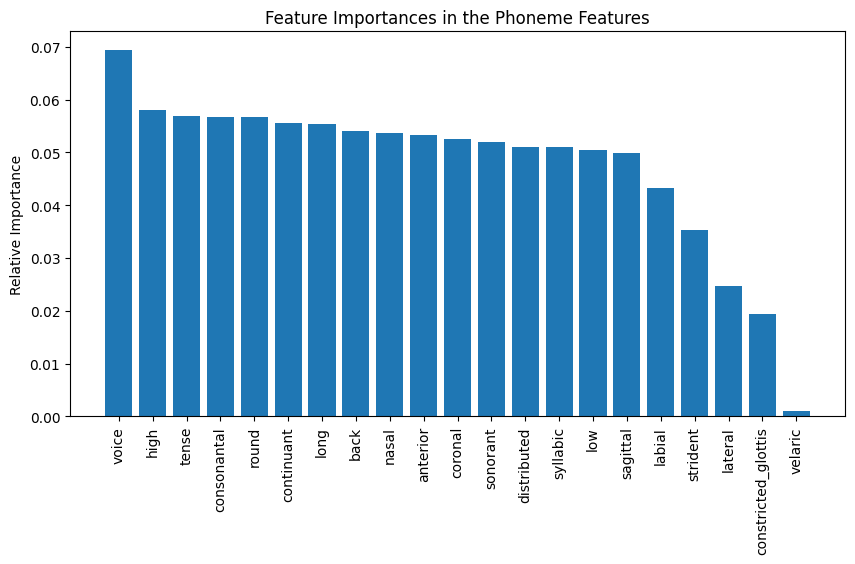

In [10]:
importances = model.feature_importances_

# Sort the feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]

# Visualize the feature importances
plt.figure(figsize=(10, 5))  
plt.title('Feature Importances in the Phoneme Features')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), [feature_full_names[i] for i in indices], rotation=90)
plt.ylabel('Relative Importance')
plt.show()

- What if we tuned for number of parameters?

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

num_params = list(range(1, 100, 1))
accuracies = []

# Split the data into features and target
X = saa_tran_df[feature_full_names]
y = saa_tran_df['country']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for param in num_params:
    model = RandomForestClassifier(n_estimators=param, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    accuracies.append(accuracy)

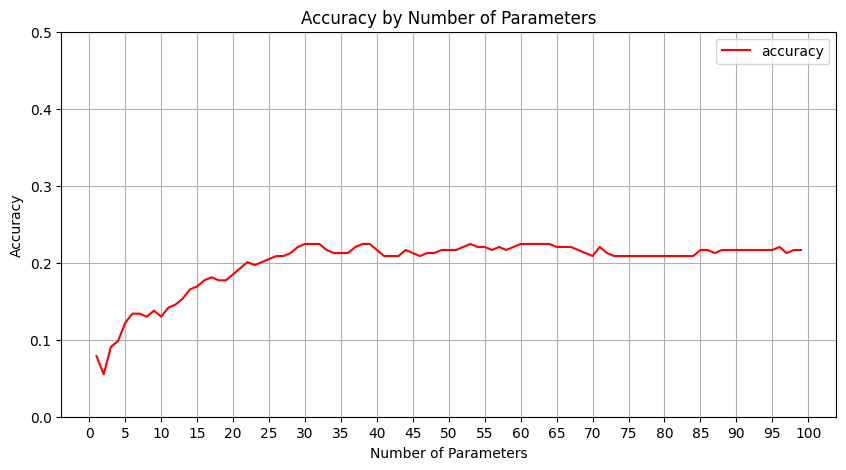

In [12]:
# Plotting the data
plt.figure(figsize=(10, 5))  
plt.plot(num_params, accuracies, color = 'red', label = 'accuracy')
plt.title('Accuracy by Number of Parameters')  
plt.xlabel('Number of Parameters')  
plt.ylabel('Accuracy') 
plt.grid(True) 
plt.xticks(range(0, 105, 5))  # Ensure all model numbers are labeled
plt.ylim(0, 0.5)  # Optionally set the y-axis limits to zoom in on accuracies
plt.legend()
plt.show()

- Overall the accuracy caps at 20% accuracy, however, we may be able to get away with only using 30 parameters, so let's go with that.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

num_params = list(range(1, 100, 1))
accuracies = []

# Split the data into features and target
X = saa_tran_df[feature_full_names]
y = saa_tran_df['country']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=30, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [14]:
def test_top_occurence(x_test, y_test, k):
    y_probs = model.predict_proba(x_test)
    top_preds_indices = np.argsort(y_probs, axis=1)[:, -k:]
    top_class_labels = np.array(model.classes_)[top_preds_indices]
    y_test_array = y_test.to_numpy()
    # Check if the true labels are within the top k predictions
    matches_top = np.array([y_test_array[i] in top_class_labels[i] for i in range(len(y_test_array))])
    return matches_top.mean()

top_k = list(range(1, 100, 1))
accuracies_country = [test_top_occurence(X_test, y_test, k) for k in top_k]

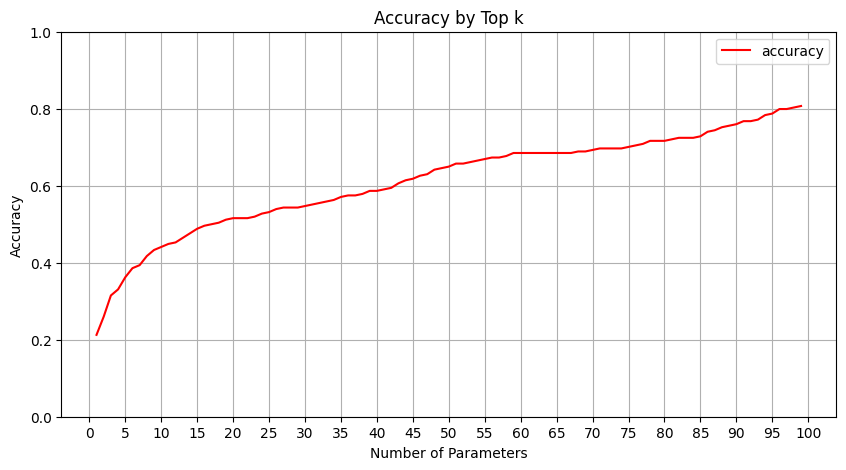

In [15]:
# Plotting the data
plt.figure(figsize=(10, 5))  
plt.plot(top_k, accuracies_country, color = 'red', label = 'accuracy')
plt.title('Accuracy by Top k')  
plt.xlabel('Number of Parameters')  
plt.ylabel('Accuracy') 
plt.grid(True) 
plt.xticks(range(0, 105, 5))  
plt.ylim(0, 1.0)  
plt.legend()
plt.show()

## Another Approach: A Regression Model

What if we used a regression model on the longitude and latitude of the country, then use some sort of distance metric to find the countries closest to the predictions?
- We can either have 2 regression models for each longitude and latitude, or one multivariate model that predicts both, we can try both approachs!

In [16]:
# Extracting latitude and longitude
saa_tran_df['latitude'] = saa_tran_df['coordinate'].apply(lambda x: x[0])
saa_tran_df['longitude'] = saa_tran_df['coordinate'].apply(lambda x: x[1])

In [17]:
# Splitting the dataset
X = saa_tran_df[feature_full_names]

y_lat = saa_tran_df['latitude']
y_lon = saa_tran_df['longitude']

X_train, X_test, y_lat_train, y_lat_test, y_lon_train, y_lon_test = train_test_split(X, y_lat, y_lon, test_size=0.2, random_state=42)

In [18]:
# Training the models
from sklearn.linear_model import LinearRegression


model_lat = LinearRegression()
model_lon = LinearRegression()
model_lat.fit(X_train, y_lat_train)
model_lon.fit(X_train, y_lon_train)

# Predicting the results
y_lat_pred = model_lat.predict(X_test)
y_lon_pred = model_lon.predict(X_test)

In [19]:
# Evaluating the model performance for latitude and longitude predictions
from sklearn.metrics import mean_squared_error, r2_score


lat_mse = mean_squared_error(y_lat_test, y_lat_pred)
lat_r2 = r2_score(y_lat_test, y_lat_pred)
lon_mse = mean_squared_error(y_lon_test, y_lon_pred)
lon_r2 = r2_score(y_lon_test, y_lon_pred)

In [20]:
# Function to calculate Haversine distance
from math import atan2, cos, radians, sin, sqrt


def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    return 2 * R * atan2(sqrt(a), sqrt(1-a))

In [21]:
# Function to map coordinates to country by finding the nearest country
def map_to_country(lat, lon, country_data):
    # Country data should have latitude, longitude for each country central point
    min_distance = float('inf')
    closest_country = None
    for index, row in country_data.iterrows():
        distance = haversine(lat, lon, row['latitude'], row['longitude'])
        if distance < min_distance:
            min_distance = distance
            closest_country = row['country']
    return closest_country

In [22]:
# Remove duplicates based on the 'country' column, keeping the first occurrence which corresponds directly
unique_countries_df = saa_tran_df.drop_duplicates(subset=['country']).copy()

# Extract latitude and longitude from the 'coordinate' tuple
unique_countries_df['latitude'] = unique_countries_df['coordinate'].apply(lambda x: x[0])
unique_countries_df['longitude'] = unique_countries_df['coordinate'].apply(lambda x: x[1])

# Create country_data_df with just the required columns
country_data_df = unique_countries_df[['country', 'latitude', 'longitude']]
country_data_df.head()

,country,latitude,longitude
0,south africa,-30.559482,22.937506
2,côte d'ivoire,7.539989,-5.547080
3,serbia,44.016521,21.005859
4,albania,41.153332,20.168331
5,ethiopia,9.145000,40.489673


In [23]:
test_coordinates = pd.DataFrame({
    'latitude': y_lat_test,
    'longitude': y_lon_test
})

# Combine into tuples
test_coordinates['coordinates'] = list(zip(test_coordinates['latitude'], test_coordinates['longitude']))

# Drop duplicates based on latitude and longitude to ensure unique index for mapping
unique_coordinate_df = saa_tran_df.drop_duplicates(subset=['latitude', 'longitude'])

# Create a map from coordinates to countries
coordinate_to_country_map = unique_coordinate_df.set_index(['latitude', 'longitude'])['country']

# Map the test coordinates to their corresponding countries using the map
country_mapping = test_coordinates['coordinates'].map(coordinate_to_country_map)
y_test = pd.DataFrame(country_mapping.tolist(), columns=['country'])
y_test.head()


,country
0,cyprus
1,austria
2,"virgin islands, u.s."
3,uganda
4,south korea


In [24]:
# Example usage (will not run here):
predicted_countries = [map_to_country(lat, lon, country_data_df) for lat, lon in zip(y_lat_pred, y_lon_pred)]
actual_countries = y_test['country'].tolist()
accuracy = np.mean([pred == actual for pred, actual in zip(predicted_countries, actual_countries)])

# Evaluating the model performance for latitude and longitude predictions

# Commented out execution results would look like this:
print(f"Latitude \tMSE: {lat_mse}\tR2: {lat_r2}")
print(f"Longitude \tMSE: {lon_mse}\tR2: {lon_r2}")
print(f"Country Prediction Accuracy: {accuracy}")

Latitude 	MSE: 433.87571918958554	R2: 0.053577876284328085
Longitude 	MSE: 3937.92735784482	R2: 0.22379898619175476
Country Prediction Accuracy: 0.003937007874015748


We can see from the R2 scores, that neither the Latitude or Longitude have strong correlations to the country label when trained on the phonetic features, and the errors from those propagates to the country predictions.
- For Latitude, which has range [-90, 90], MSE (mean squared error) of 433.87571918958554 means our ME (mean error) is 20.8296836075 degrees ~ 2,331 kilometers.
- For Longitude, which has range [-180, 180], MSE (mean squared error) of 3937.92735784482 means our ME (mean error) is 62.7529071665 degrees ~ 6,986  kilometers at the equator.
- Considering that the average size of countries is 655985 square kilometers, meaning that average 'width' and 'length' is 809.929009235, thus considering the data, we are able to narrow the regionality to 3x8= 24 surrounding countries. which is basically the average size of each continent if not more.
- Let's try and see if the top country at least occurs at the top predictions by applying the same k method.

In [25]:
def map_to_top_countries(lat, lon, country_data, top_n=3):
    # Calculate distances and sort by nearest
    distances = country_data.apply(
        lambda row: haversine(lat, lon, row['latitude'], row['longitude']),
        axis=1
    )
    closest_countries = distances.nsmallest(top_n).index
    return list(country_data.loc[closest_countries]['country'])

In [27]:
# Example usage
def get_accuracy(top_n=3):
    predicted_countries_lists = [map_to_top_countries(lat, lon, country_data_df, top_n) for lat, lon in zip(y_lat_pred, y_lon_pred)]
    actual_countries = y_test['country'].tolist()
    # Calculate accuracy by checking if predicted is in the list of top closest countries
    accuracy = np.mean([actual in predicted_list for actual, predicted_list in zip(actual_countries, predicted_countries_lists)])
    return accuracy
print('accuracy when we look at closest country to the true country: ', get_accuracy(3))

accuracy when we look at closest country to the true country:  0.003937007874015748


In [28]:
top_n_range = list(range(0, 100, 5))
accuracies = [get_accuracy(top_n=n) for n in top_n_range]

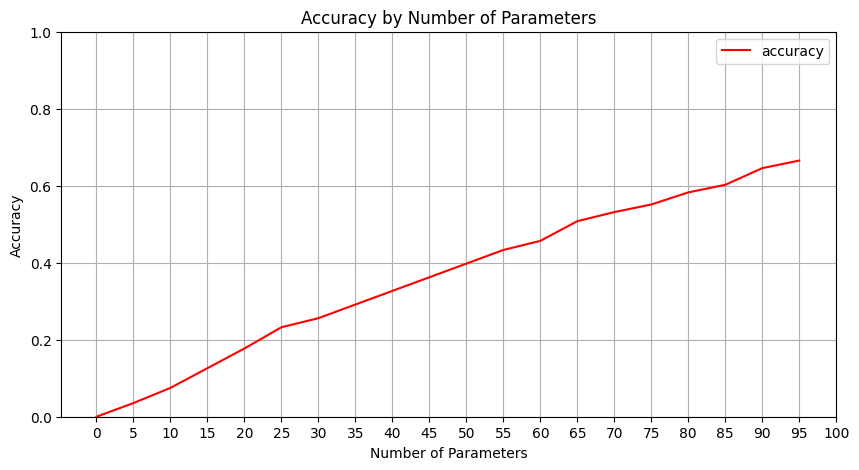

In [31]:
# Plotting the data
plt.figure(figsize=(10, 5))  
plt.plot(top_n_range, accuracies, color = 'red', label = 'accuracy')
plt.title('Accuracy by Number of Parameters')  
plt.xlabel('Number of Parameters')  
plt.ylabel('Accuracy') 
plt.grid(True) 
plt.xticks(range(0, 105, 5))  # Ensure all model numbers are labeled
plt.ylim(0, 1)  # Optionally set the y-axis limits to zoom in on accuracies
plt.legend()
plt.show()